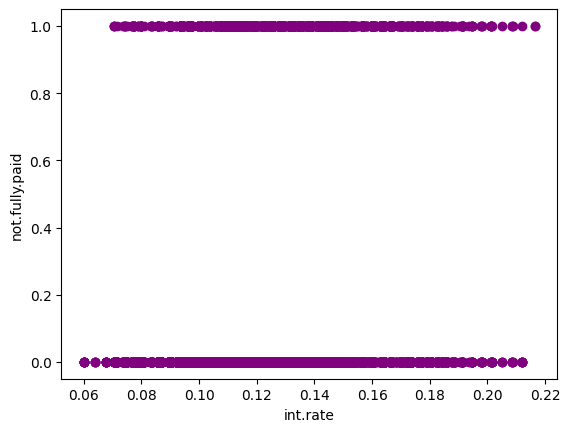

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/loan_data.csv', index_col=0)





In [ ]:
# Display the first few rows of the features
x.head()



,int.rate
credit.policy,
1,0.1189
1,0.1071
1,0.1357
1,0.1008
1,0.1426


In [ ]:
# Display the first few rows of the target variable
y.head()



credit.policy
1    829.10
1    228.22
1    366.86
1    162.34
1    102.92
Name: installment, dtype: float64

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
precision=precision_score(y,x)
acurracy=accuracy_score(y,x)
recall=recall_score(y,x)
F1=f1_score(y,x)
confuison=confusion_matrix(y,x)
print(precision)
print(acurracy)
print(recall)
print(F1)

ValueError: continuous is not supported

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'M/F')

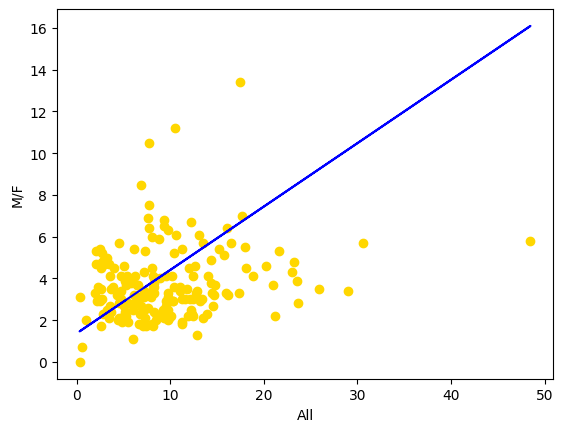

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create a Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x_train, y_train)

# Make a prediction on a single data point from the test set
prediction = lr.predict(x_test.iloc[0].values.reshape(1, 1))

# Scatter plot of the original data points
plt.scatter(df['All'], df['M/F'], color='gold')

# Plot the regression line using the training data
plt.plot(x_train, lr.predict(x_train), label='Regression Line', color='blue')

# Labeling the plot
plt.xlabel('All')
plt.ylabel('M/F')




In [ ]:
# Retrieve the slope (m), intercept (b), and R-squared score of the model
m = lr.coef_
b = lr.intercept_
print(m)
print(b)

[0.30367545]
1.372324600853407


In [ ]:
r2_score = lr.score(x_test, y_test)

# Print the R-squared score
print(f'R-squared: {r2_score * 100:.2f}%')

# Show the plot
plt.show()

R-squared: 69.79%


R-squared: -6.21%


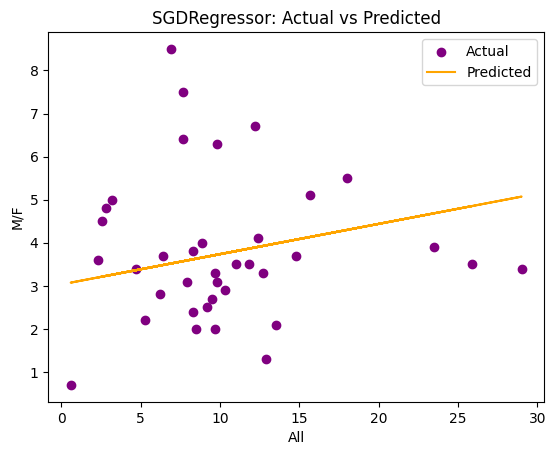

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('/content/world_suicide_rate_2023.csv', index_col=0)

# Extract features and target variable
X = df['All'].values.reshape(-1, 1)
y = df['M/F'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Standardize features (important for SGDRegressor)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, eta0=0.01, alpha=0.001)

# Train the model
sgd_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = sgd_model.predict(X_test_scaled)

# Evaluate the model
r2_score_value = r2_score(y_test, y_pred)
print(f'R-squared: {r2_score_value*100:.2f}%')

# Plot the regression line
plt.scatter(X_test, y_test, color='purple', label='Actual')
plt.plot(X_test, y_pred, color='orange', label='Predicted')
plt.xlabel('All')
plt.ylabel('M/F')
plt.title('SGDRegressor: Actual vs Predicted')
plt.legend()
plt.show()
